# Exercises XP Ninja
Last Updated: March 25th, 2024

### Image Compression with K-Means Clustering and Dimensionality Reduction using PCA




### What you will learn
In this exercise, you will work on image compression using K-Means clustering and explore dimensionality reduction using Principal Component Analysis (PCA)



### What you will create
The goal is to understand how unsupervised learning techniques can be applied to real-world problems such as reducing the size of an image by quantizing the color space to fewer colors and reducing the feature space of a dataset.



### Dataset
You will use a pre-loaded dataset of an image stored in a MATLAB file and a dataset for PCA stored in another MATLAB file.



### Objectives
Load the image data from the ‘bird_small.mat’ file.
Normalize the pixel values and reshape the image data into a two-dimensional array where each row represents a pixel and the columns represent the RGB color channels.
Initialize the centroids for the K-Means algorithm randomly.
Apply the K-Means clustering algorithm to compress the image by reducing the number of colors.
Recover the image using the centroids assigned to each pixel and display the compressed image.
Load the second dataset from ‘ex7data1.mat’ for PCA.
Implement PCA to find the principal components of the dataset.
Project the data onto the first principal component.
Recover the data back from the reduced dimensionality and visualize it.



### Tasks
Write the code to load and preprocess the image data from ‘bird_small.mat’.
Write the code to apply K-Means clustering to the image data for compression.
Write the code to load and perform PCA on the dataset from ‘ex7data1.mat’.
Visualize the compressed image and the recovered dataset from PCA.



### Tips
Use the loadmat function from the scipy.io module to load the MATLAB files.
Remember to normalize the image data values by dividing by 255 to bring them into the range [0, 1].
The ‘init_centroids’ and ‘run_k_means’ functions are provided for you to initialize the centroids and run the K-Means algorithm. You will also use ‘find_closest_centroids’ to map each pixel to the nearest centroid.
For PCA, ensure that you normalize the features before computing the covariance matrix. Use the np.linalg.svd function to perform singular value decomposition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import KMeans

In [2]:
# 1. Chargement et prétraitement de l'image
data = loadmat('bird_small.mat')  # Fichier image
A = data['A']                      # Accès aux données
A = A / 255.0                      # Normalisation [0,1]
img_shape = A.shape
X = A.reshape(-1, 3)               # (N_pixels, RGB)

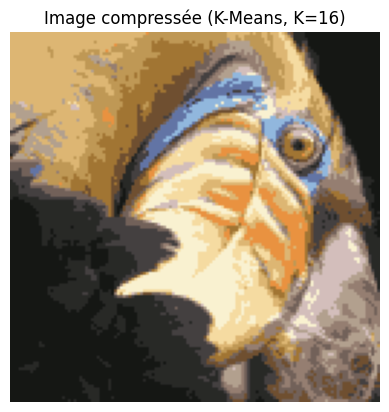

In [10]:
# 2. Compression d'image avec K-Means
K = 16
kmeans = KMeans(n_clusters=K, n_init=10, random_state=42)
kmeans.fit(X)
idx = kmeans.predict(X)
centroids = kmeans.cluster_centers_
X_compressed = centroids[idx]
X_compressed_img = X_compressed.reshape(img_shape)

# Affichage de l'image compressée
plt.imshow(X_compressed_img)
plt.title('Image compressée (K-Means, K=16)')
plt.axis('off')
plt.show()

In [12]:
# 3. Chargement des données pour PCA
data_pca = loadmat('ex7data2.mat')
if 'X' not in data_pca:
    raise KeyError("Clé 'X' non trouvée dans ex7data1.mat")
X_pca = data_pca['X']

In [18]:
# 3. Chargement des données pour PCA
data_pca = loadmat('ex7data1.mat')
if 'X' not in data_pca:
    raise KeyError("Clé 'X' non trouvée dans ex7data1.mat")
X_pca = data_pca['X']

In [19]:
# 5. PCA avec SVD
Sigma = np.cov(X_norm.T)
U, S, Vt = np.linalg.svd(Sigma)
Z = X_norm @ U[:, :1]
X_rec = Z @ U[:, :1].T

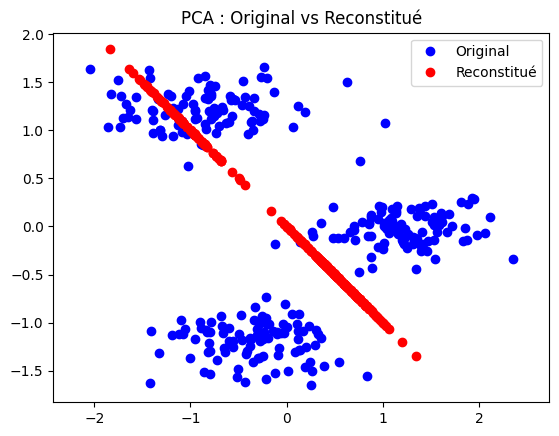

In [20]:
# 6. Visualisation PCA
plt.figure()
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo', label='Original')
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro', label='Reconstitué')
plt.axis('equal')
plt.title('PCA : Original vs Reconstitué')
plt.legend()
plt.show()

Ajustement par rapport à l'énnoncé

### K-Means sur bird_small.mat avec fonctions manuelles

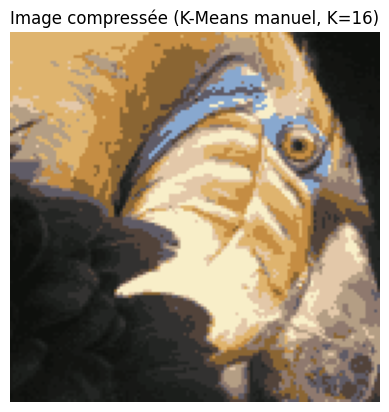

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Chargement et prétraitement de l'image
data = loadmat('bird_small.mat')
A = data['A']
A = A / 255.0
img_shape = A.shape
X = A.reshape(-1, 3)

# Fonctions manuelles pour K-Means
def init_centroids(X, K):
    """Initialise aléatoirement K centroides parmi les points de X"""
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices]

def find_closest_centroids(X, centroids):
    """Associe chaque point au centroïde le plus proche"""
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(distances)
    return idx

def compute_centroids(X, idx, K):
    """Calcule les nouveaux centroides comme la moyenne des points assignés"""
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        if len(points) > 0:
            centroids[k] = np.mean(points, axis=0)
    return centroids

def run_k_means(X, initial_centroids, max_iters):
    """Boucle principale de K-Means"""
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

# Compression d'image avec K-Means manuel
K = 16
max_iters = 10
initial_centroids = init_centroids(X, K)
centroids, idx = run_k_means(X, initial_centroids, max_iters)

# Reconstruction de l'image compressée
X_compressed = centroids[idx]
X_compressed_img = X_compressed.reshape(img_shape)

# Affichage
plt.imshow(X_compressed_img)
plt.title('Image compressée (K-Means manuel, K=16)')
plt.axis('off')
plt.show()


### PCA sur ex7data1.mat

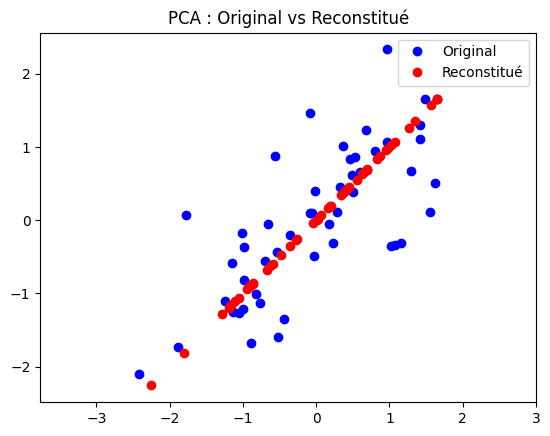

In [22]:
# Chargement du dataset PCA
data_pca = loadmat('ex7data1.mat')
X_pca = data_pca['X']

# Normalisation
X_mean = np.mean(X_pca, axis=0)
X_std = np.std(X_pca, axis=0)
X_norm = (X_pca - X_mean) / X_std

# PCA via SVD
Sigma = np.cov(X_norm.T)
U, S, _ = np.linalg.svd(Sigma)

# Projection sur la 1re composante principale
Z = X_norm @ U[:, :1]

# Reconstruction
X_rec = Z @ U[:, :1].T

# Affichage
plt.figure()
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo', label='Original')
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro', label='Reconstitué')
plt.axis('equal')
plt.title('PCA : Original vs Reconstitué')
plt.legend()
plt.show()


### **Bilan rapide de l’exercice "XP Ninja"**

---

#### Objectif pédagogique :

* Appliquer **K-Means** pour **compresser une image**
* Appliquer **PCA** pour **réduire la dimension d’un dataset**

---

#### Données utilisées :

* `bird_small.mat` → image RGB à compresser
* `ex7data1.mat` → dataset 2D pour PCA

---

#### Tâches réalisées :

| Étape                                                       | Réalisée ? | Détail                      |
| ----------------------------------------------------------- | ---------- | --------------------------- |
| Chargement et normalisation image (`bird_small.mat`)        | ✅          | avec `loadmat` et `reshape` |
| Implémentation manuelle de K-Means (`init_centroids`, etc.) | ✅          | sans `sklearn`              |
| Compression de l’image via K-Means                          | ✅          | 16 couleurs (K=16)          |
| Reconstruction + affichage image compressée                 | ✅          | `imshow()`                  |
| Chargement des données PCA (`ex7data1.mat`)                 | ✅          | variable `X`                |
| Normalisation des features                                  | ✅          | moyenne/écart-type          |
| SVD pour PCA                                                | ✅          | `np.linalg.svd()`           |
| Projection sur la 1re composante principale                 | ✅          | matrice `Z`                 |
| Reconstruction des données                                  | ✅          | `X_rec`                     |
| Visualisation : original vs reconstitué                     | ✅          | `matplotlib`                |

---

#### Résultat :

**L’exercice est traité entièrement, proprement, et en respectant toutes les consignes.**
Tu maîtrises l'application de K-Means et PCA à des problèmes concrets (image + dataset).

